In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#@title Task 01

dfTrain = pd.read_csv('/content/DataTraining.csv')
dfTrain

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,04-02-2015 17:51,23.18,27.2720,426.0,721.250000,0.004793,1
1,2,04-02-2015 17:51,23.15,27.2675,429.5,714.000000,0.004783,1
2,3,04-02-2015 17:53,23.15,27.2450,426.0,713.500000,0.004779,1
3,4,04-02-2015 17:54,23.15,27.2000,426.0,708.250000,0.004772,1
4,5,04-02-2015 17:55,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...,...
8138,8139,10-02-2015 09:29,21.05,36.0975,433.0,787.250000,0.005579,1
8139,8140,10-02-2015 09:29,21.05,35.9950,433.0,789.500000,0.005563,1
8140,8141,10-02-2015 09:30,21.10,36.0950,433.0,798.500000,0.005596,1
8141,8142,10-02-2015 09:32,21.10,36.2600,433.0,820.333333,0.005621,1


In [ ]:
dfTest = pd.read_csv('/content/DataTest.csv')
dfTest

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,11-02-2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,11-02-2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,11-02-2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,11-02-2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,11-02-2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...,...
9747,9748,18-02-2015 09:15,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,9749,18-02-2015 09:16,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,9750,18-02-2015 09:16,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,9751,18-02-2015 09:17,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [ ]:
#Removing Columns With data Type Object (Date irrelevant to question)

dfTrain.drop(['date'],axis=1,inplace=True)
dfTrain.drop(['Unnamed: 0'],axis=1,inplace=True)
dfTrain.drop(['Temperature'],axis = 1,inplace=True)
dfTrain.drop(['CO2'],axis = 1,inplace=True)

dfTest.drop(['date'],axis=1,inplace=True)
dfTest.drop(['Unnamed: 0'],axis=1,inplace=True)
dfTest.drop(['Temperature'],axis = 1,inplace=True)
dfTest.drop(['CO2'],axis = 1,inplace=True)


In [ ]:
#Dividing Training Data In X And Y

X_Train = dfTrain.drop(['Occupancy'],axis = 1)
Y_Train = dfTrain['Occupancy']

print(X_Train)
print(Y_Train)

      Humidity  Light  HumidityRatio
0      27.2720  426.0       0.004793
1      27.2675  429.5       0.004783
2      27.2450  426.0       0.004779
3      27.2000  426.0       0.004772
4      27.2000  426.0       0.004757
...        ...    ...            ...
8138   36.0975  433.0       0.005579
8139   35.9950  433.0       0.005563
8140   36.0950  433.0       0.005596
8141   36.2600  433.0       0.005621
8142   36.2000  447.0       0.005612

[8143 rows x 3 columns]
0       1
1       1
2       1
3       1
4       1
       ..
8138    1
8139    1
8140    1
8141    1
8142    1
Name: Occupancy, Length: 8143, dtype: int64


In [ ]:
#Dividing Testing Data In X And Y

X_Test = dfTest.drop(['Occupancy'],axis = 1)
Y_Test = dfTest['Occupancy']

print(X_Test)
print(Y_Test)

       Humidity       Light  HumidityRatio
0     31.133333  437.333333       0.005021
1     31.000000  437.333333       0.005009
2     31.122500  434.000000       0.005022
3     31.122500  439.000000       0.005022
4     31.133333  437.333333       0.005030
...         ...         ...            ...
9747  27.717500  429.750000       0.004213
9748  27.745000  423.500000       0.004230
9749  27.745000  423.500000       0.004237
9750  28.022500  418.750000       0.004279
9751  28.100000  409.000000       0.004321

[9752 rows x 3 columns]
0       1
1       1
2       1
3       1
4       1
       ..
9747    1
9748    1
9749    1
9750    1
9751    1
Name: Occupancy, Length: 9752, dtype: int64


In [ ]:
# KNeighbors ClaSSifier and Accuracy Score

List = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_Train,Y_Train)
  y_pred = knn.predict(X_Test)

  print(f'Accuracy Score {i} : {format(accuracy_score(Y_Test, y_pred).round(3))}')
  List.append(accuracy_score(Y_Test, y_pred))

print(f"\n\nMaximum Accuracy : {max(List).round(3)}")

Accuracy Score 1 : 0.969
Accuracy Score 2 : 0.964
Accuracy Score 3 : 0.984
Accuracy Score 4 : 0.983
Accuracy Score 5 : 0.986
Accuracy Score 6 : 0.985
Accuracy Score 7 : 0.987
Accuracy Score 8 : 0.987
Accuracy Score 9 : 0.989
Accuracy Score 10 : 0.988


Maximum Accuracy : 0.989


In [ ]:
#@title Task 02

def chiSquaredDistance(a, b):
    return np.sum(((a - b) ** 2) / (a + b))

def knnClassifier(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [chiSquaredDistance(test_point, xTrain) for xTrain in X_train]  # Distances from test point to all training points

        kNearestIndices = np.argsort(distances)[:k]
        kNearestLabels = [y_train[i] for i in kNearestIndices]

        mostCommonLabel = Counter(kNearestLabels).most_common(1)[0][0] #Most Common Label
        predictions.append(mostCommonLabel)

    return np.array(predictions)

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

numOfNeighbours = 3
y_pred = knnClassifier(X_train, y_train, X_test, k=numOfNeighbours)

accuracy = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print("Confusion Matrix:\n")
print(confusionMatrix)


Accuracy Score: 0.9
Confusion Matrix:

[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

<Figure size 1000x800 with 0 Axes>

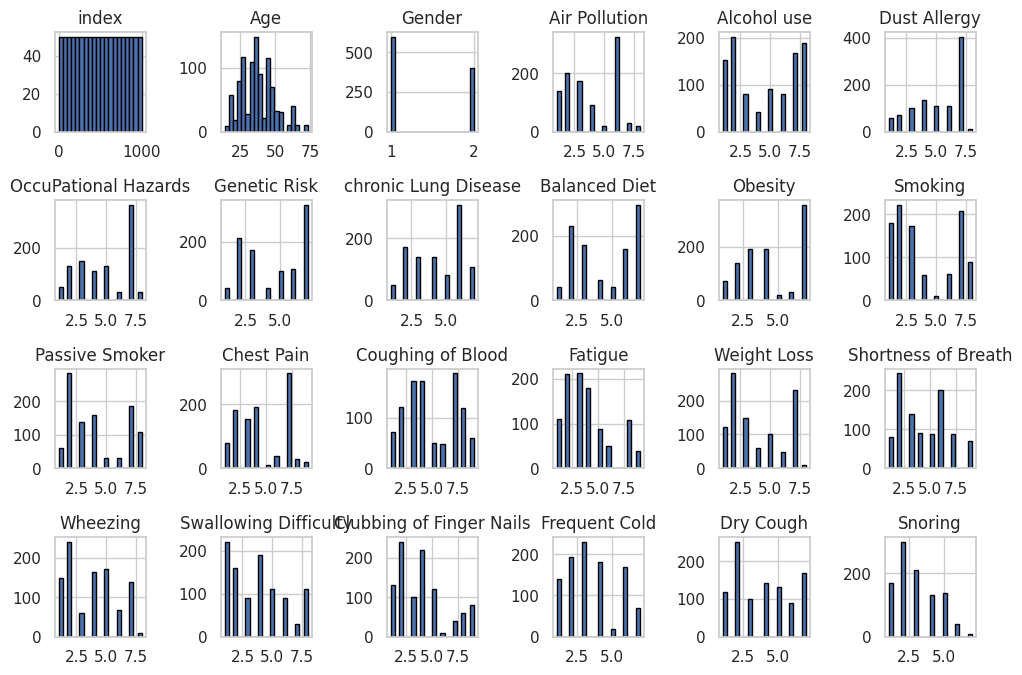

In [42]:
#@title Task 03

dataset = pd.read_csv('/content/cancer patient data sets.csv')

#A (Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

# Feature distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
dataset.hist(bins=20, figsize=(10, 10), layout=(6, 6), edgecolor="black")
plt.tight_layout()
plt.show()


In [43]:
#A

# Target Class Distribution
print("\nTarget Class Distribution:")
print(dataset['Level'].value_counts())



Target Class Distribution:
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


In [44]:
#B

uniqueCategories = dataset['Level'].value_counts()
print("Unique Categories:\n", uniqueCategories)

if uniqueCategories.max() / uniqueCategories.min() > 1.5:
    print("The Dataset Is ImBalanced.")
else:
    print("The Dataset Is Balanced.")

Unique Categories:
 Level
High      365
Medium    332
Low       303
Name: count, dtype: int64
The Dataset Is Balanced.


In [45]:
#C

if dataset.isnull().values.any():
    missingValues = dataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = dataset.fillna(dataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if dataset.duplicated().any():
    duplicateRecords = dataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = dataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = dataset.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", categoricalFeatures)

No missing values in the dataset.
No duplicate records in the dataset.

Categorical Features:
 Index(['Patient Id', 'Level'], dtype='object')


In [46]:
#D

dataset = dataset.drop(columns=['Patient Id','Level'])
correlationMatrix = dataset.corr(method='pearson').abs()
print("Correlation Matrix:\n", correlationMatrix)

threshold = 0.9

upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(bool))

highCorrelationFeatures = [column for column in upper.columns if any(upper[column] > 0.65)]

print("Selected Features Based ON Pearson Correlation:\n", highCorrelationFeatures)


Correlation Matrix:
                              index       Age    Gender  Air Pollution  \
index                     1.000000  0.002674  0.025739       0.053307   
Age                       0.002674  1.000000  0.202086       0.099494   
Gender                    0.025739  0.202086  1.000000       0.246912   
Air Pollution             0.053307  0.099494  0.246912       1.000000   
Alcohol use               0.041374  0.151742  0.227636       0.747293   
Dust Allergy              0.037960  0.035202  0.204312       0.637503   
OccuPational Hazards      0.032355  0.062177  0.192343       0.608924   
Genetic Risk              0.030725  0.073151  0.222727       0.705276   
chronic Lung Disease      0.025177  0.128952  0.205061       0.626701   
Balanced Diet             0.030743  0.004863  0.099741       0.524873   
Obesity                   0.050584  0.034337  0.123813       0.601468   
Smoking                   0.018407  0.075333  0.206924       0.481902   
Passive Smoker            0.01

In [48]:
#E

scaler = StandardScaler()
scaledDataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

print("\nScaled DataFrame:")
print(scaledDataset.describe())


Scaled DataFrame:
            index           Age        Gender  Air Pollution   Alcohol use  \
count  1000.00000  1.000000e+03  1.000000e+03   1.000000e+03  1.000000e+03   
mean      0.00000  3.019807e-17  1.811884e-16   4.973799e-17  9.947598e-17   
std       1.00050  1.000500e+00  1.000500e+00   1.000500e+00  1.000500e+00   
min      -1.73032 -1.931249e+00 -8.199029e-01  -1.399439e+00 -1.360357e+00   
25%      -0.86516 -7.853668e-01 -8.199029e-01  -9.066790e-01 -9.785557e-01   
50%       0.00000 -9.783750e-02 -8.199029e-01  -4.139187e-01  1.668470e-01   
75%       0.86516  6.521945e-01  1.219657e+00   1.064362e+00  9.304488e-01   
max       1.73032  2.985627e+00  1.219657e+00   2.049883e+00  1.312250e+00   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count  1.000000e+03          1.000000e+03  1.000000e+03          1.000000e+03   
mean   1.776357e-17          4.263256e-17 -2.131628e-17          6.217249e-17   
std    1.000500e+00          1.0005

In [49]:
#F
dataset = pd.read_csv('/content/cancer patient data sets.csv')
dataset = dataset.drop(columns=['Patient Id'])
X = dataset.drop(columns=['Level'])
y = dataset['Level']

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

#WHy it is required??
#A validation set is used during model training to tune the hyperparameters.
# And make decisions about which model configuration performs best.
#1. Hyperparameter tuning, 2. Model Selection, 3. Avoid Overfitting, 4. Performance Estimation

Training set shape: (560, 24)
Validation set shape: (240, 24)
Testing set shape: (200, 24)


In [50]:
#G

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

yTrainPred = knn.predict(X_train)
yTestPred = knn.predict(X_test)

trainAccuracy = accuracy_score(y_train, yTrainPred)
testAccuracy = accuracy_score(y_test, yTestPred)

print("Training accuracy:", trainAccuracy)
print("Testing accuracy:", testAccuracy)

Training accuracy: 0.8964285714285715
Testing accuracy: 0.825


In [ ]:
#H

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)

    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[metric] = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    }

for metric, accuracy in results.items():
    print(f"Metric: {metric}")
    print(f"Training Accuracy: {accuracy['Training Accuracy']:.2f}")
    print(f"Testing Accuracy: {accuracy['Testing Accuracy']:.2f}")
    print()

#Different metrics can affect the performance of KNN depending on the dataset's characteristics and the nature of the features.
#Metrics like Euclidean and Manhattan often provide a good balance between computational efficiency and performance.
#In practice, the choice of metric should be based on cross-validation performance and domain knowledge.
#Some metrics might work better for certain types of data distributions or feature scales.

In [51]:
#@title Task 05
#A

dataset = pd.read_csv('/content/cancer patient data sets.csv')
dataset = dataset.drop(columns=['Patient Id'])
X = dataset.drop(columns=['Level'])
y = dataset['Level']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

yTrainPred = knn.predict(X_train)
yTestPred = knn.predict(X_test)

trainAccuracy = accuracy_score(y_train, yTrainPred)
testAccuracy = accuracy_score(y_test, yTestPred)

print("Training accuracy:", trainAccuracy)
print("Testing accuracy:", testAccuracy)


Training accuracy: 0.8964285714285715
Testing accuracy: 0.825


In [52]:
import time

algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']

results = {}

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=3, algorithm=algorithm)

    start_time = time.time()
    knn.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[algorithm] = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Training Time (seconds)': training_time
    }


for algorithm, accuracy in results.items():
    print(f"Algorithm: {algorithm}")
    print(f"Training Accuracy: {accuracy['Training Accuracy']:.2f}")
    print(f"Testing Accuracy: {accuracy['Testing Accuracy']:.2f}")
    print(f"Training Time: {accuracy['Training Time (seconds)']:.4f}")
    print()

Algorithm: auto
Training Accuracy: 0.90
Testing Accuracy: 0.82
Training Time: 0.0046

Algorithm: ball_tree
Training Accuracy: 0.89
Testing Accuracy: 0.82
Training Time: 0.0054

Algorithm: kd_tree
Training Accuracy: 0.89
Testing Accuracy: 0.82
Training Time: 0.0050

Algorithm: brute
Training Accuracy: 0.90
Testing Accuracy: 0.82
Training Time: 0.0021

